# Проверка работы симулятора триггера на экспериментальных данных 2013 года.

Ко всем кадрам, зарегистрированным в эксперименте 2013 года, применена процедура определения того факта, будет ли данное событие зарегистрировано установкой. Для каждого кадра определяется время срабатывания триггера, исходя из значения порогов, выставленных в эксперименте установкой на момент регистрации данного события.

#### Чтение данных моделирования триггерного бита

In [107]:
!date

Срд Дек 21 20:58:34 MSK 2016


In [108]:
!pwd

/home/sphere/Analysis/400CheckTrigger/results/all_events


In [109]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from tqdm import tqdm
import math as mt
import numpy as np

In [258]:
# чтение данных
datum = pd.read_csv('log.txt', index_col=0, sep=' ')
# оличество событий
len(datum)

3813

In [186]:
datum[:2]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10675,1,1,238,238,1,3
10676,1,1,201,239,1,3


Значения параметров:

    FlagL3 - сработало ли триггерное условие L3: 0 - нет, 1 - да,
    FlagG5 - сработало ли триггерное условие G5,
    TL3 - время срабатывания триггерного условия L3,
    TG5 - время срабатывания триггерного условия G5,
    TriggerFlag - выработался ли вообще триггер на регистрацию
    TT - условие, по которому выработался триггер. Т.е. какое из условий L3 и G5 наступило раньше.

### Распределение по TL3 и TG5

Рассмотрены все 3813 кадров, зарегистрированные в 2013 г.

In [203]:
print('TriggerFlag:', len(datum[:][datum['TriggerFlag']==1]))
print('FlagL3:     ', len(datum[:][datum['FlagL3']     ==1]))
print('FlagG5:     ', len(datum[:][datum['FlagL3']     ==1]))

TriggerFlag: 3813
FlagL3:      3813
FlagG5:      3813


Во всех 3813 событиях в процессе моделирования "выработался" итоговый триггер TriggerFlag, а также триггеры L3 и G5.

Распределение по триггерам L3 и G5 следующее: в 3140 кадрах первым сработал триггер L3, в 673 кадрах --- G5. 

In [206]:
print(datum['TT'].value_counts());

3    3140
5     673
Name: TT, dtype: int64


In [251]:
AllTrig_l3 = datum['TL3'][datum['TT']==3]
print('lenTL3 = ',len(AllTrig_l3))
AllTrig_g5 = datum['TG5'][datum['TT']==5]
print('lenTG5 = ',len(AllTrig_g5))

lenTL3 =  3140
lenTG5 =  673


Построим распределение всех времен выработки триггера без отбора.

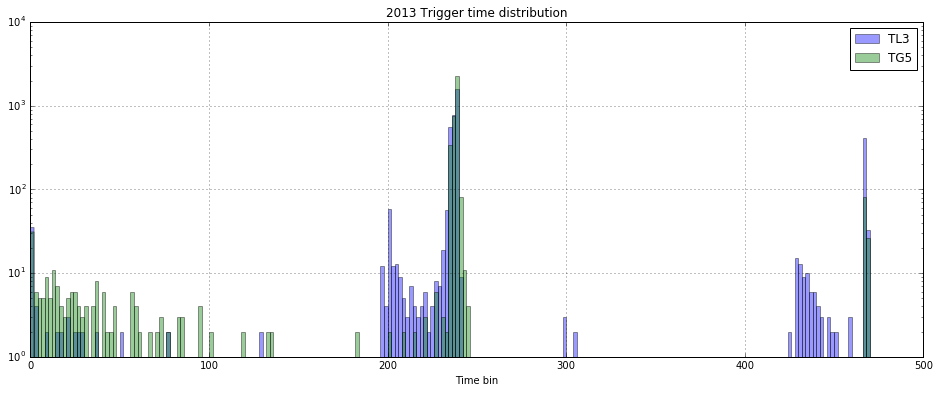

In [220]:
plt.figure(figsize=(16,6))
plt.hist(datum['TL3'], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(datum['TG5'], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

Теперь построим распределение только того триггера, который случился раньше и "вызвал" регистрацию события. Он должен быть в районе 200-300 бина. Однако, наблюдаются триггеры, случившиеся ранее этого интервала.

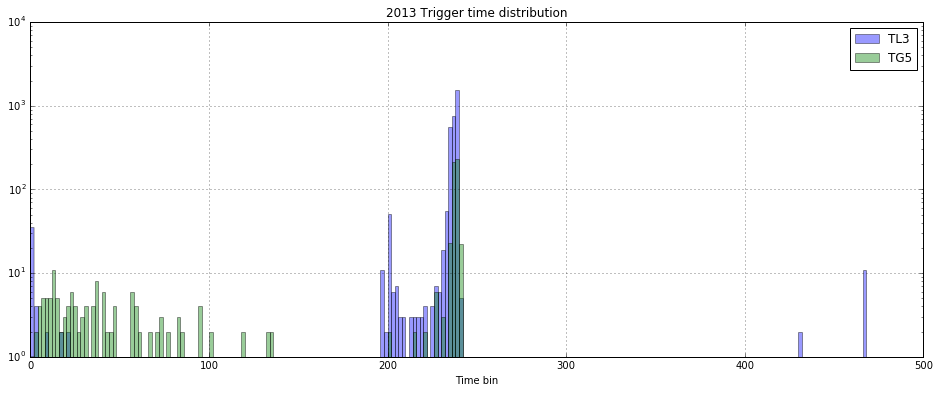

In [256]:
plt.figure(figsize=(16,6))
#plt.hist(datum['TL3'][datum['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
#plt.hist(datum['TG5'][datum['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.hist(AllTrig_l3[:], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(AllTrig_g5[:], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.title('2013 Trigger time distribution')
plt.xlabel('Time bin')
plt.grid()

Посчитаем количество событий с триггерами раньше нужного.

In [257]:
mint = 180
print('TL3 <', mint, ':', len(Trig_l3[:][Trig_l3 < mint]))
print('TG5 <', mint, ':', len(Trig_g5[:][Trig_g5 < mint]))

TL3 < 180 : 50
TG5 < 180 : 156


 Раньше нужного триггер L3 "сработал" в 50 из 3140 кадрах (1,5%), а триггер G5 в 156 из 673 кадров (23.2%).

#### Чтение списка калибровочных событий

In [225]:
calibr = pd.read_csv('Calibr.2013.txt', index_col=0, sep=' ')
print('len=',len(calibr))

len= 3813


In [226]:
calibr[:2]

,Calibr
Event,
10675,0
10676,1


###  некалибровочные события

In [259]:
# отбор некалибровочных событий
Events=datum[:][calibr['Calibr']==0]
print('NonCalibration events: ', len(Events))
Events[:3]

NonCalibration events:  1937


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10675,1,1,238,238,1,3
10677,1,1,235,236,1,3
10679,1,1,224,233,1,3


In [260]:
#
print('TriggerFlag = 0:',len(Events[:][Events['TriggerFlag']==0]))
Trig_l3 = Events['TL3'][Events['TT']==3]
print('lenTL3 = ',len(Trig_l3))
Trig_g5 = Events['TG5'][Events['TT']==5]
print('lenTG5 = ',len(Trig_g5))

TriggerFlag = 0: 0
lenTL3 =  1339
lenTG5 =  598


В 1339 некалибровочных событиях первым сработал триггер L3, в 598 - G5.

In [261]:
mint = 180
print('TL3 <', mint, ':', len(Trig_l3[:][Trig_l3 < mint]))
print('TG5 <', mint, ':', len(Trig_g5[:][Trig_g5 < mint]))

TL3 < 180 : 36
TG5 < 180 : 83


В 36+83 некалибровочных кадрах триггер сработал до бина 180. 

Раньше нужного триггер L3 "сработал" в 36 из 1339 кадрах (2.7%), а триггер G5 в 83 из 598 кадров (13.9%).


In [179]:
#Events['TG5'][Events['TT']==5].value_counts()
#Events['TL3'][Events['TT']==3].value_counts()

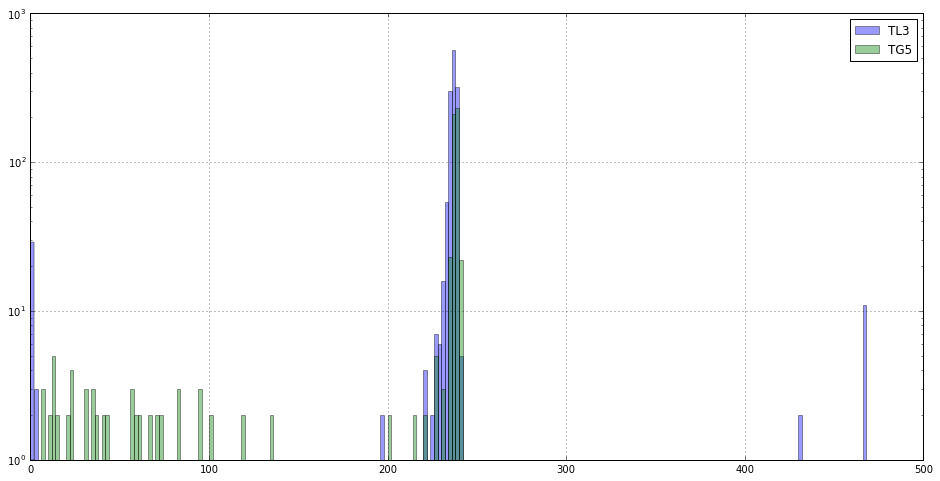

In [265]:
plt.figure(figsize=(16,8))
plt.hist(Events['TL3'][Events['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(Events['TG5'][Events['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.grid()

## Калибровочные события

In [151]:
# отбор калибровочных событий
Calibr=datum[:][calibr['Calibr']==1]
print('Calibration events: ', len(Calibr))
Calibr[:3]

Calibration events:  1839


,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10676,1,1,201,239,1,3
10678,1,1,200,238,1,3
10682,1,1,201,239,1,3


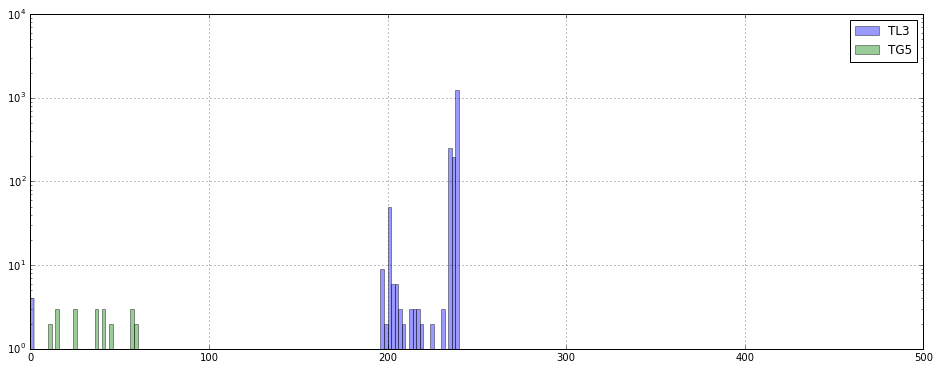

In [232]:
plt.figure(figsize=(16,6))
plt.hist(Calibr['TL3'][Calibr['TT']==3], range=[0, 500], bins=250, alpha=0.4, label=r"TL3")
plt.hist(Calibr['TG5'][Calibr['TT']==5], range=[0, 500], bins=250, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
plt.yscale('log')
plt.grid()

In [132]:
print('lenTL3 = ',len(Calibr['TL3'][Calibr['TT']==3]))
print('lenTG5 = ',len(Calibr['TG5'][Calibr['TT']==5]))

lenTL3 =  1794
lenTG5 =  45


In [240]:
print('TL3 < 180:',len(Calibr['TL3'][Calibr['TL3']<180]))
print('TG5 < 180:',len(Calibr['TG5'][Calibr['TG5']<180]))
#Calibr['TG5'][Calibr['TT']==5].value_counts()
#Calibr['TL3'][Calibr['TT']==3].value_counts()

TL3 < 180: 15
TG5 < 180: 51
